In [1]:
# Import neccesary libraries
import matplotlib.pyplot as plt
import matplotlib as mat
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data
country = pd.read_csv("DS1_C5_S3_BazilHousing_Data_Hackathon.csv")
country

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
country.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
country.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [5]:
country.shape

(10692, 13)

In [6]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [7]:
country.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [8]:
country.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [9]:
# Seperate data by datatypes

def seperate_data_types(country):
    categorical = []
    continous = []
    for column in country.columns:
        if country[column].dtypes == object:
            categorical.append(column)
        else:
            continous.append(column)
    return categorical,continous
categorical,continous = seperate_data_types(country)
table = [categorical,continous]
print(tabulate({'Categorical':categorical,'Continous':continous},headers=['categorical','continous']))

categorical    continous
-------------  -------------------
city           area
animal         rooms
furniture      bathroom
               parking spaces
               floor
               hoa (R$)
               rent amount (R$)
               property tax (R$)
               fire insurance (R$)
               total (R$)


# Analysing Dataset for Bachelors : 

# Uni-Variate : 

### * City : City- Wise Counts of Available Properties

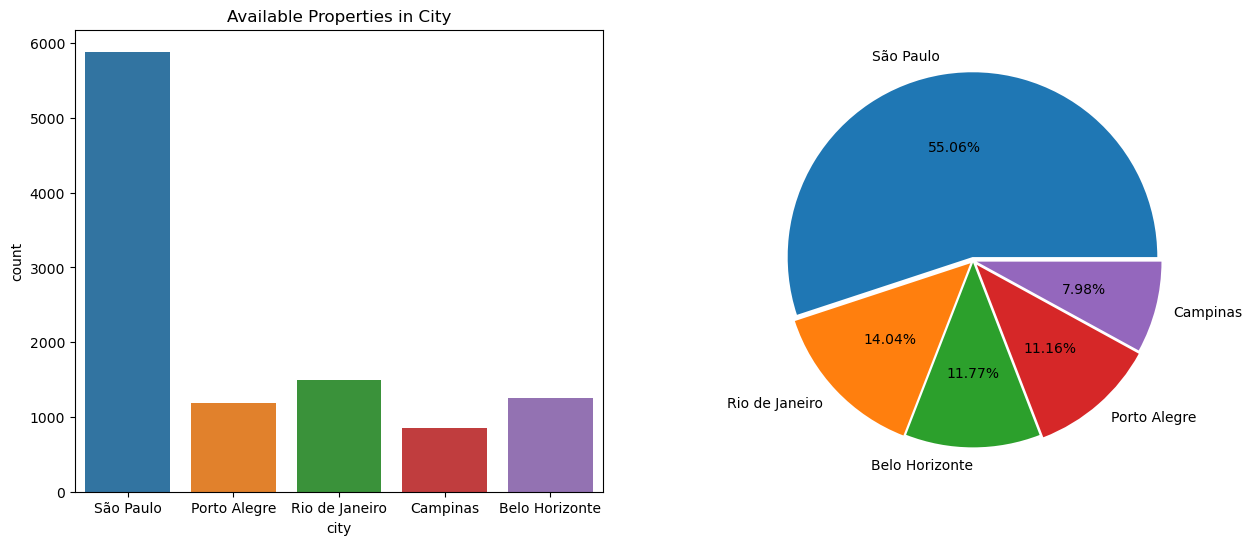

In [10]:
fig,ax = plt.subplots(1,2,figsize=(15,6)) 
ax[0].set_title("Available Properties in City")
data = country['city'].value_counts()
labels = data.keys()
sns.countplot(x=country['city'],ax=ax[0])
plt.pie(data, labels = labels , autopct = "%.2f%%",explode = [0.02,0.02,0.01,0.03,0.02])
plt.show()

## Interpretation : Sao Paulo and Rio de Janeiro are very Popular so It will be Expensive Living then I will Choose City Porto Alegre, Campinas and Belo Horizonte for Analysis.

### * Furniture : Room is furnished or non-furnished

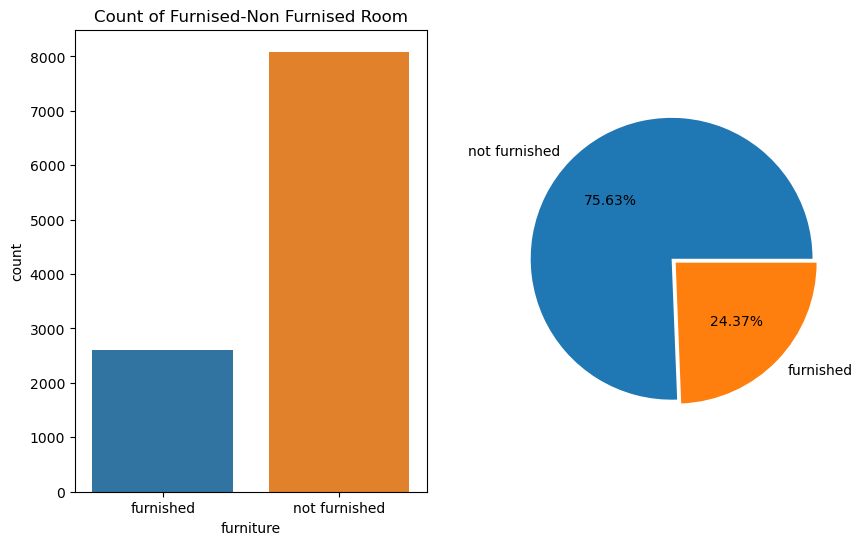

In [11]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].set_title("Count of Furnised-Non Furnised Room")
data = country['furniture'].value_counts()
labels = data.keys()
plt.pie(data, labels = labels , autopct = "%.2f%%",explode = [0.02,0.02])
sns.countplot(x=country['furniture'],ax=ax[0])
plt.show()

## Interpretation : Furnished Rooms are less Count so Availablity of furnished rooms will costly than non-furnished room. 

### * Rooms : Number of Rooms Available

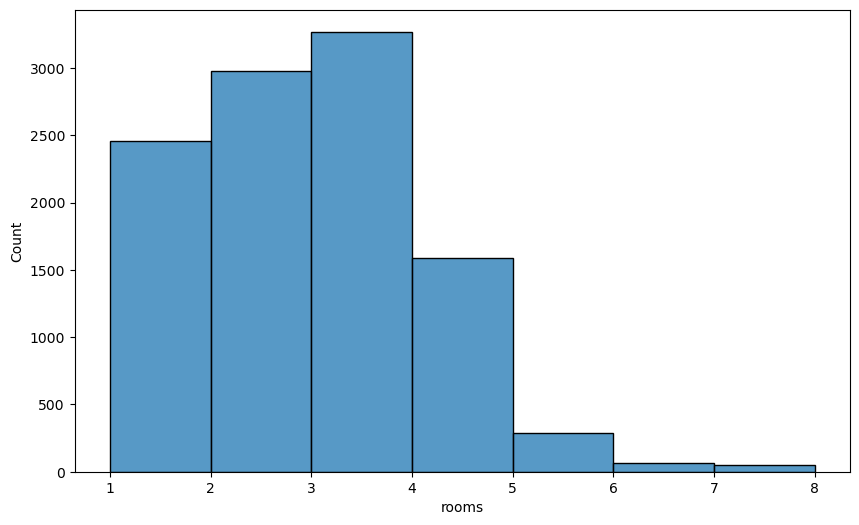

In [12]:
fig,ax = plt.subplots(figsize=(10,6))
bins = [1,2,3,4,5,6,7,8]
sns.histplot(x=country['rooms'],bins=bins)
plt.show()

## Interpretation : here 3 rooms count is maximum. these are suitable for large family but i am analysis for bachelor So , I will go for 2 rooms , this is 2nd maximum count.So 2 rooms are easily available for bachelors.

### * parking : Parking needed for Bachelor and Family

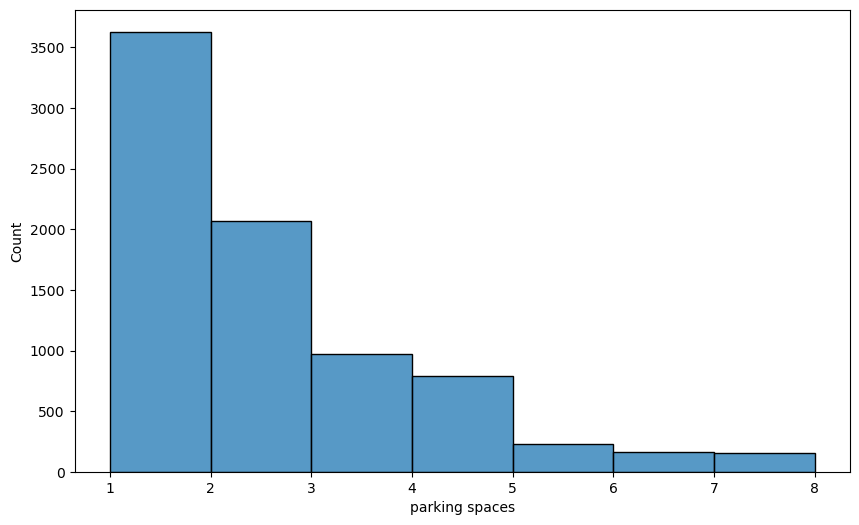

In [13]:
fig,ax = plt.subplots(figsize=(10,6))
bins = [1,2,3,4,5,6,7,8]
sns.histplot(x=country['parking spaces'],bins=bins)
plt.show()

## Interpretation : 1 parking is most and good for bachelor and mid-size family also.

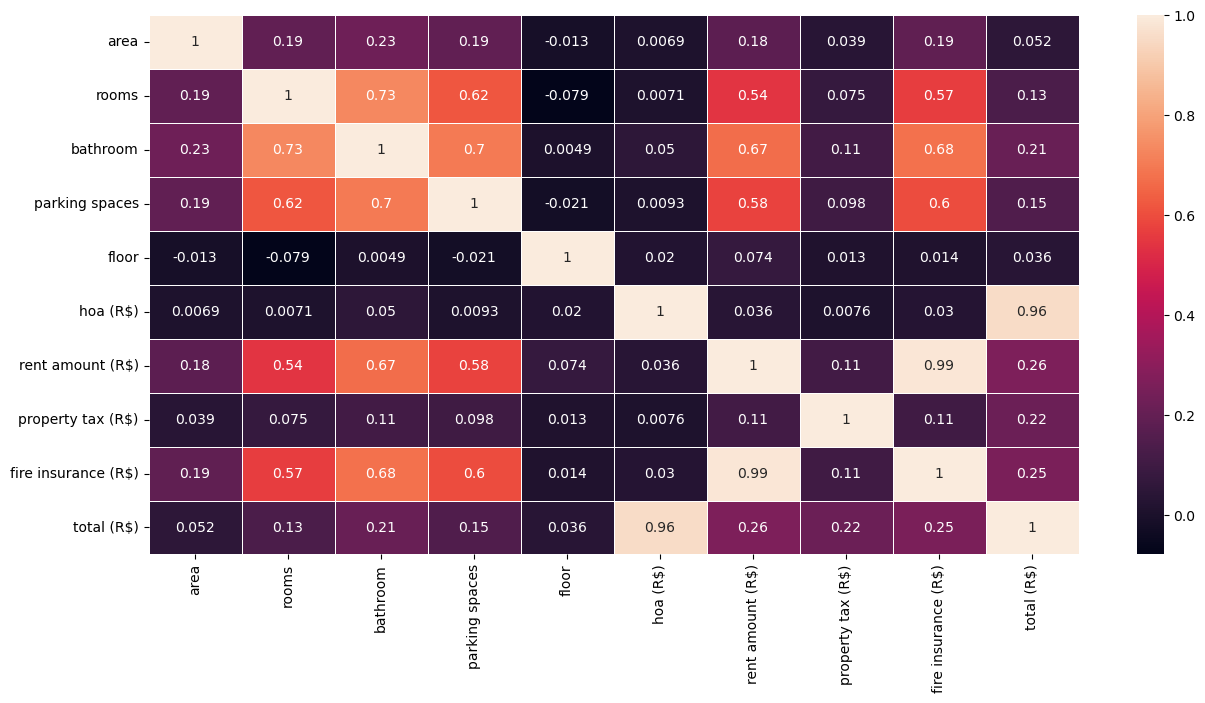

In [3]:
fig,ax = plt.subplots(figsize=(15,7))
sns.heatmap(country.corr() , cbar=True , linewidth = 0.5, annot = True)
plt.show()

## Interpretation : Displaying Co-Relation between all numerical columns by Heatmap.
#### As per heatmap ,
* Rooms are Positively co-related with Bathroom , Parking spaces Rent amount and fire insurance.
* hoa is strongly Positive co-related with Total Amount.
* Rent amount column is Strongly Positive Co-related with fire-insurance Column.

# Bi- Variate : 

#### *Filter out the most expensive cities.

In [4]:
# filter the city according to expensive
brazil_country = country[(country['city']!='São Paulo') & (country['city']!='Rio de Janeiro')]
brazil_country

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,Belo Horizonte,75,2,1,1,3,not acept,not furnished,180,1250,0,17,1447
10673,Porto Alegre,220,3,2,2,15,acept,not furnished,842,2400,117,36,3395
10676,Porto Alegre,40,1,1,0,1,acept,not furnished,330,1200,159,18,1707
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419


In [15]:
def info_of_cat(col):
    print(f" Unique Values in {col} : {brazil_country[col].unique()}")
    print(f" Mode in {col} : {brazil_country[col].mode()[0]}")
    print(f" Total Null Counts in {col} : {brazil_country[col].isnull().sum()}")

# Task 1 - Analyze City wise Count plot for Furnised rooms

In [16]:
info_of_cat('city')

 Unique Values in city : ['Porto Alegre' 'Campinas' 'Belo Horizonte']
 Mode in city : Belo Horizonte
 Total Null Counts in city : 0


In [17]:
info_of_cat('furniture')

 Unique Values in furniture : ['not furnished' 'furnished']
 Mode in furniture : not furnished
 Total Null Counts in furniture : 0


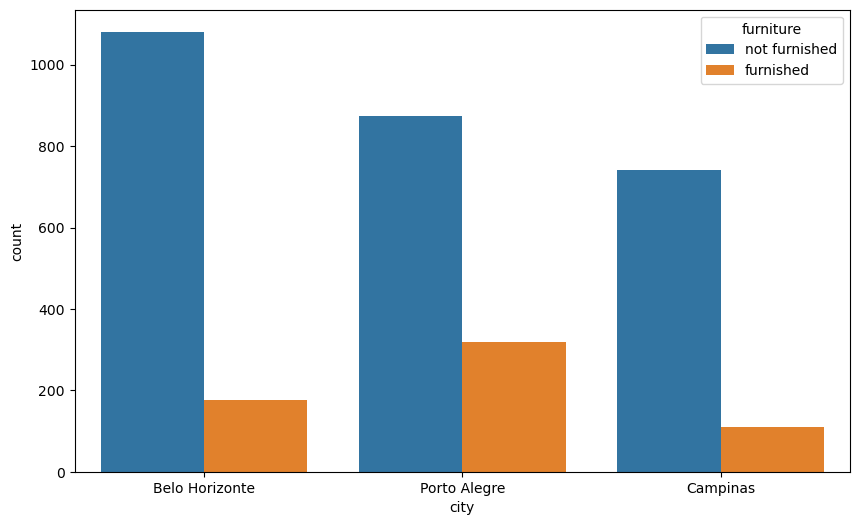

In [18]:
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(x=brazil_country['city'], hue =brazil_country['furniture'],order =brazil_country['city'].value_counts().index)
plt.show()

## Interpretation : Porto Alegre City have most Furnished and 2nd most Non-furnished Rooms are available. Rooms will be easily available So Maximum can Shift to Porto Alegre City. 

# Task 2 - Analyze City- wise Rooms Available

In [19]:
def info_of_num(col):
    print(f" Mean in {col} : {brazil_country[col].mean()}")
    print(f" Median in {col} : {brazil_country[col].median()}")
    print(f" Mode in {col} : {brazil_country[col].mode()[0]}")
    print(f" Varience of {col} : {brazil_country[col].var()}")
    print(f" SD of {col} : {brazil_country[col].std()}")
    print(f" CV of {col} : {(brazil_country[col].std()/brazil_country[col].mean())*100}")
    print(f" Total Null Counts in {col} : {brazil_country[col].isnull().sum()}")
    print(f" Skewness in {col} : {brazil_country[col].skew()}")

In [20]:
info_of_num('rooms')

 Mean in rooms : 2.531174334140436
 Median in rooms : 2.0
 Mode in rooms : 2
 Varience of rooms : 1.4782891442880566
 SD of rooms : 1.215849145366339
 CV of rooms : 48.034982378218146
 Total Null Counts in rooms : 0
 Skewness in rooms : 0.7919913978824008


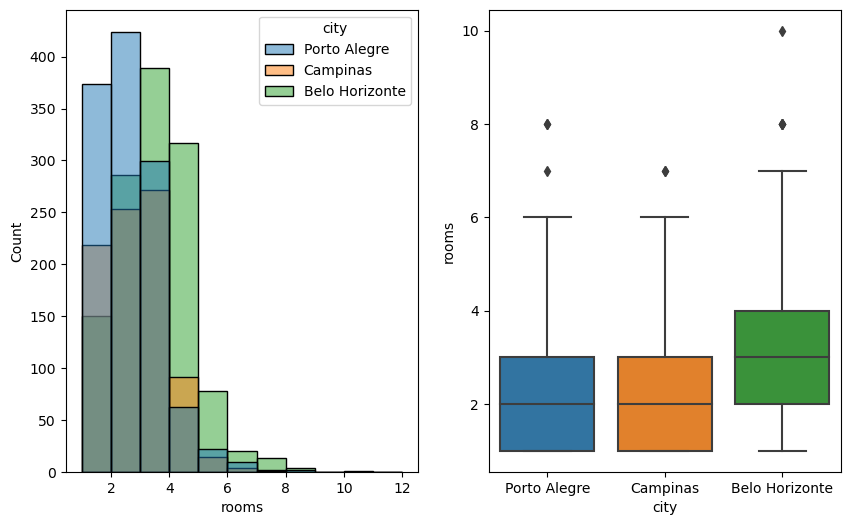

In [21]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
bins = [1,2,3,4,5,6,7,8,9,10,11,12]
sns.histplot(x=brazil_country['rooms'], hue =brazil_country['city'],ax=ax[0],bins=bins)
sns.boxplot(x=brazil_country['city'], y =brazil_country['rooms'],ax=ax[1])
plt.show()

# Outliers Analysis and Treatment

In [22]:
x = brazil_country[brazil_country['rooms']>=7].index
print(x)
for index in x:
    brazil_country.loc[index,'rooms']=2.531174334140436

Int64Index([  546,   570,   752,  1041,  1452,  1942,  2748,  2867,  3511,
             3792,  4634,  4961,  5660,  6101,  6454,  7292,  8278,  8435,
             9021,  9140,  9959,  9989, 10587],
           dtype='int64')


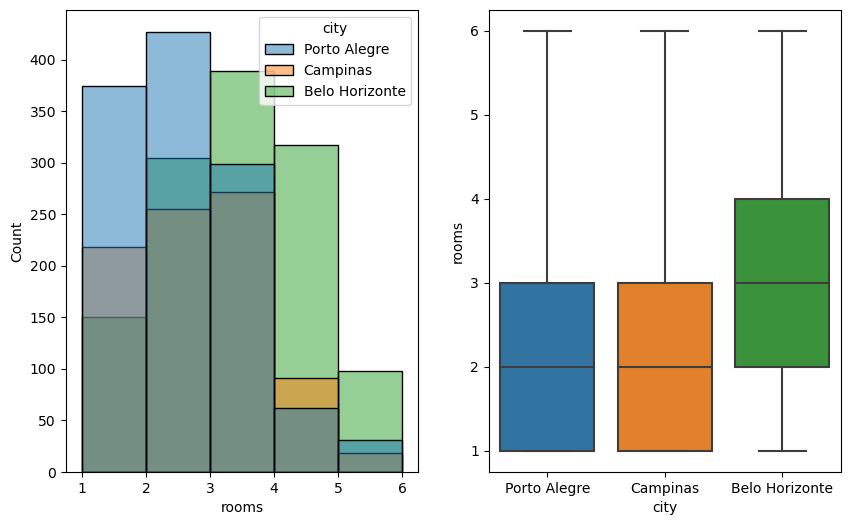

In [23]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
bins = [1,2,3,4,5,6]
sns.histplot(x=brazil_country['rooms'], hue =brazil_country['city'],ax=ax[0],bins=bins)
sns.boxplot(x=brazil_country['city'], y =brazil_country['rooms'],ax=ax[1])
plt.show()

## Interpretation : Porto Alegre City have maximum count of 2 number of rooms are available than other two cities. Two rooms are good for Bachelor Employees. If u have large Family then Belo Horizonte City will be right choice , because In Belo Horizonte 4,5 and 6 Number of Rooms are mostly available. 

# Task 3 - Analyze Rooms are Furnished or Not Furnished  

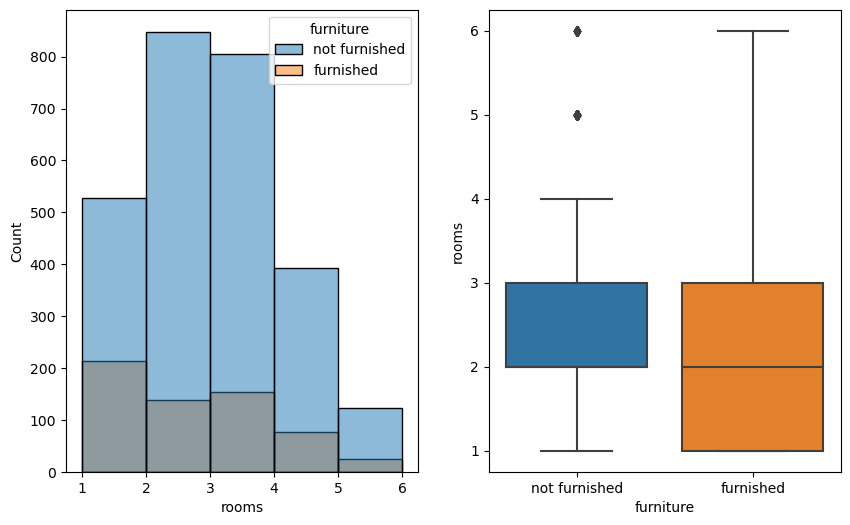

In [24]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
bins = [1,2,3,4,5,6]
sns.histplot(x=brazil_country['rooms'], hue =brazil_country['furniture'],ax=ax[0],bins=bins)
sns.boxplot(x=brazil_country['furniture'], y =brazil_country['rooms'],ax=ax[1])
plt.show()

## Interpretation : Not Furnished counts are more in all three cities but  '2' number of rooms with non-furnished counts are more. and less number of furnished rooms so less count and more demand then cost will be high for furnished rooms. So for Bachelors , Non-Furnished and 2 rooms will be good choice. 

# Task 4 - Analyze City- wise rent amount spending.

In [25]:
info_of_num('rent amount (R$)')

 Mean in rent amount (R$) : 2849.6032082324455
 Median in rent amount (R$) : 1800.0
 Mode in rent amount (R$) : 1200
 Varience of rent amount (R$) : 8176900.733516745
 SD of rent amount (R$) : 2859.528061327034
 CV of rent amount (R$) : 100.34828895005157
 Total Null Counts in rent amount (R$) : 0
 Skewness in rent amount (R$) : 2.366374180448996


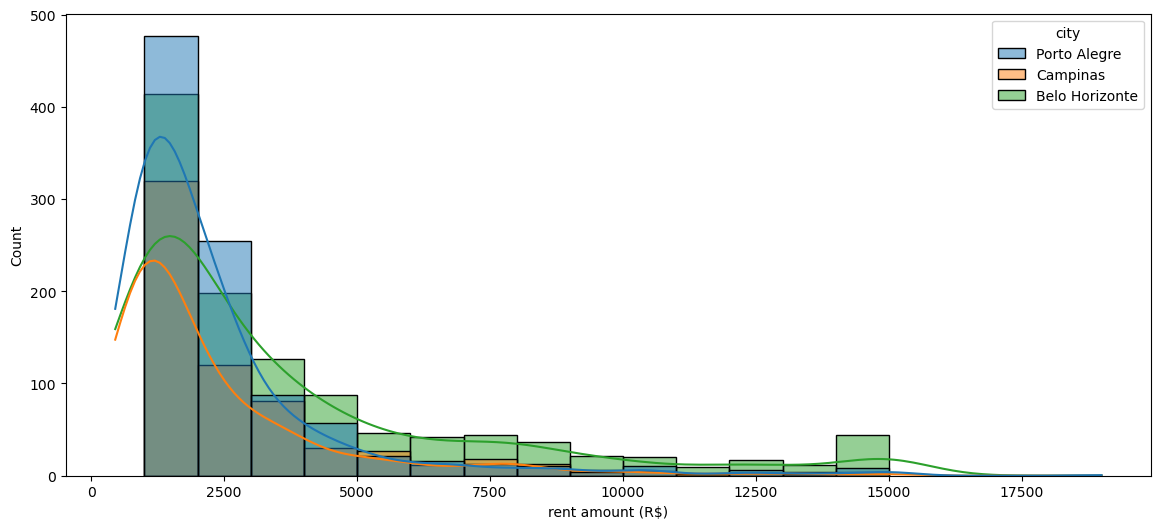

In [41]:
fig,ax = plt.subplots(figsize=(14,6))
bins = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000]
sns.histplot(x=brazil_country['rent amount (R$)'], hue =brazil_country['city'],bins=bins,kde=True)
plt.show()

## Interpretation : from graphs , here is right skewed . and Maximum rooms are available in less than Rs - 2000 in Porto Alegre City.

## Task 5 - Analyze City- wise property tax (R$).

In [27]:
info_of_num('property tax (R$)')

 Mean in property tax (R$) : 186.76452784503633
 Median in property tax (R$) : 86.0
 Mode in property tax (R$) : 0
 Varience of property tax (R$) : 130754.71050640712
 SD of property tax (R$) : 361.6002081116756
 CV of property tax (R$) : 193.61289442056432
 Total Null Counts in property tax (R$) : 0
 Skewness in property tax (R$) : 14.330597686338313


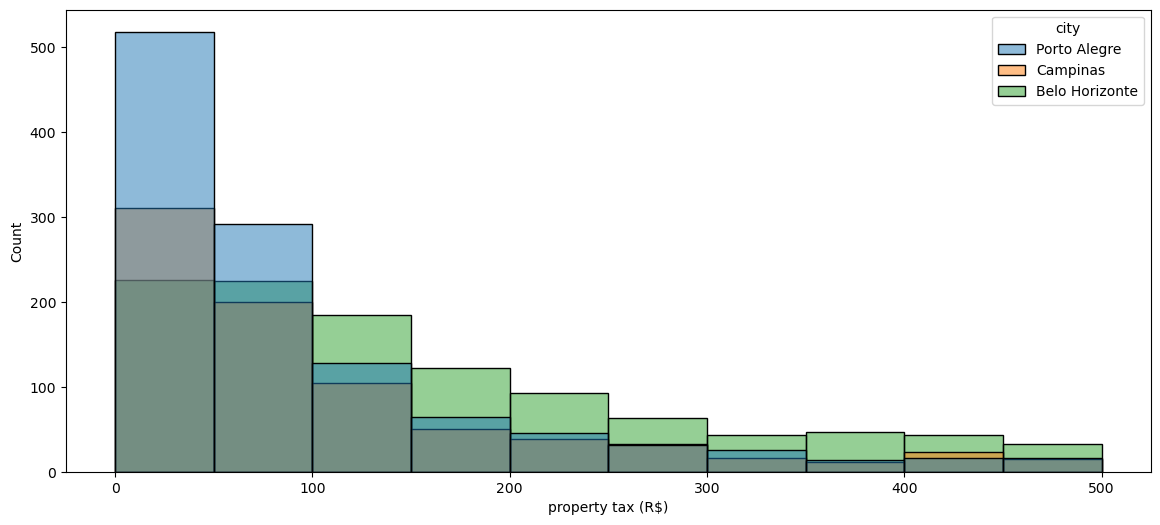

In [46]:
fig,ax = plt.subplots(figsize=(14,6))
bins = [0,50,100,150,200,250,300,350,400,450,500]
sns.histplot(x=brazil_country['property tax (R$)'], hue =brazil_country['city'],bins=bins)
plt.show()

## Interpretation : from graphs , here is right skewed .Less Property tax in Porto Alegre so , This city will be First choice for Bachelors.

# Task 6 - Analyze Relationship City vs property tax (R$), City vs Rent Amount , City vs Total Amount

In [29]:
b_coun=brazil_country.groupby(by=['city'])[['property tax (R$)']].mean()
b_coun_1=brazil_country.groupby(by=['city'])[['rent amount (R$)']].mean()
b_coun_2=brazil_country.groupby(by=['city'])[['total (R$)']].mean()

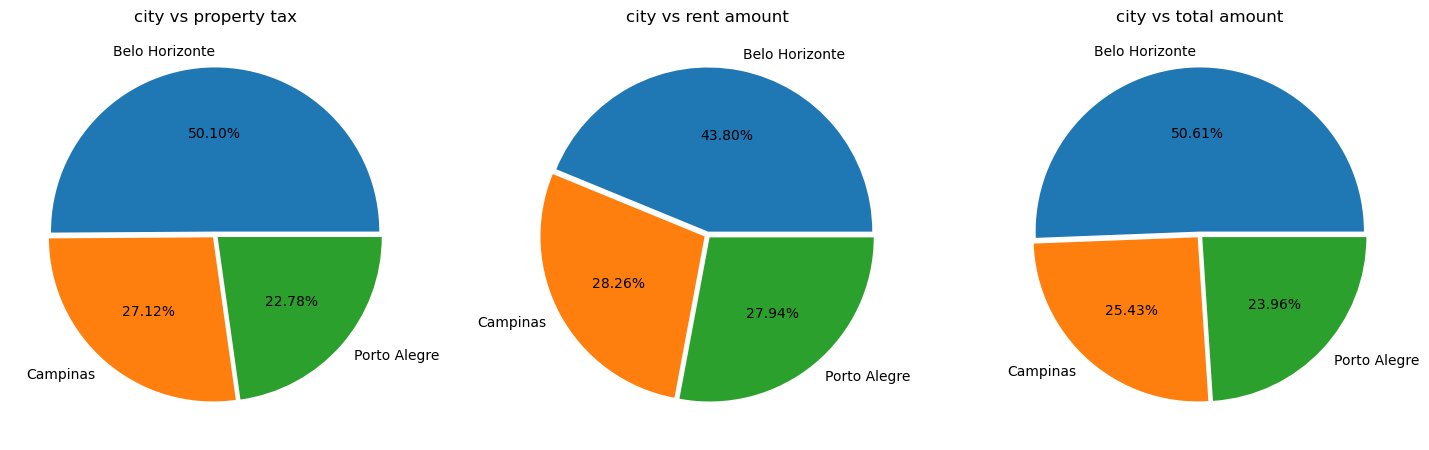

In [30]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))
c = b_coun['property tax (R$)']
ax[0].set_title('city vs property tax')
labels = b_coun.index
ax[0].pie(x = c,labels = labels, autopct = '%0.2f%%',explode = [0.02,0.02,0.02])

c1 = b_coun_1['rent amount (R$)']
ax[1].set_title('city vs rent amount')
labesl = b_coun_1.index
ax[1].pie(x = c1,labels = labels, autopct = '%0.2f%%',explode = [0.02,0.02,0.02])

c2 = b_coun_2['total (R$)']
ax[2].set_title('city vs total amount')
labels = b_coun_2.index
ax[2].pie(x = c2,labels = labels, autopct = '%0.2f%%',explode = [0.02,0.02,0.02])

plt.show()

# Interpretation : From this all three Pie Charts , Belo Horizonte  is city where Rent amount , Property Tax and Total Amounts are high so , "Belo Horizonte" will be good choice for "Large Family" and "Porto Alegre" is city Where Rent Amount and Total Amount are lesser than other cities so "Porto Alegre" is best choice for "Bachelors".

# LineChart : City vs property tax

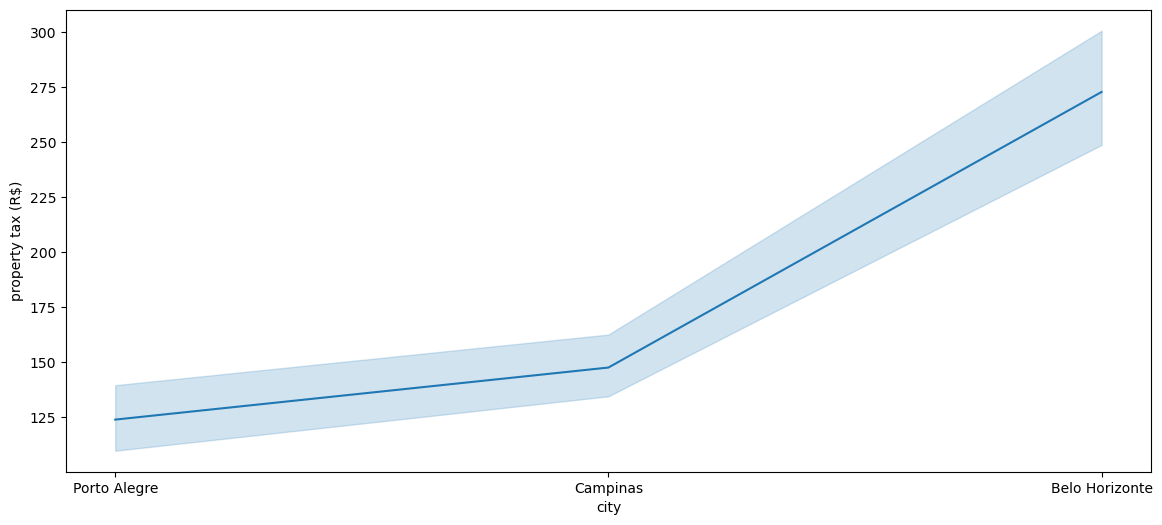

In [19]:
fig,ax = plt.subplots(figsize=(14,6))

sns.lineplot(x = 'city' , y = 'property tax (R$)' , data = brazil_country)
plt.show()

# LineChart : City vs property tax , rent amount , total amount

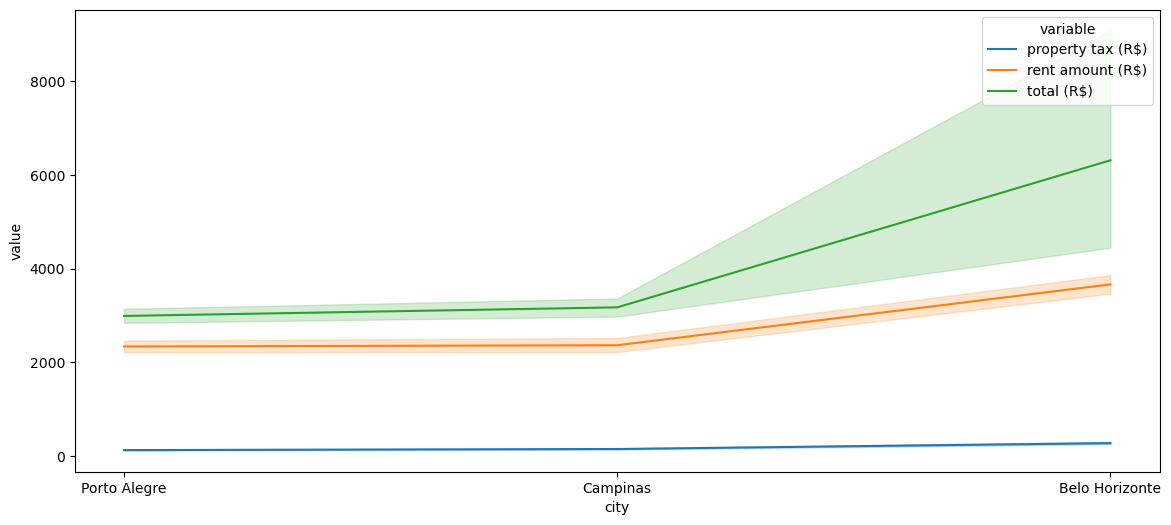

In [18]:
fig,ax = plt.subplots(figsize=(14,6))
melted_df = pd.melt(brazil_country, id_vars=['city'], value_vars=['property tax (R$)','rent amount (R$)','total (R$)' ], var_name='variable', value_name='value')
sns.lineplot(x = 'city' , y = 'value' , hue = 'variable', data = melted_df)
plt.show()

# Multi-Variate :

## City-Wise Average of -  Area ,Number of rooms, Rent Amount , Property tax , Total Amount

In [31]:
# these data will be helpful for filter
data = pd.pivot_table(brazil_country,index= ['city'],values=['rooms','area','rent amount (R$)','property tax (R$)','total (R$)'])
data

,area,property tax (R$),rent amount (R$),rooms,total (R$)
city,,,,,
Belo Horizonte,207.411765,272.782194,3664.127981,2.951161,6315.242448
Campinas,137.561547,147.657679,2364.290739,2.344739,3173.276671
Porto Alegre,103.609388,124.021794,2337.699916,2.127907,2989.782900


## Interpretation : These are Average of all important columns , these will be helpful for analyzing and filtering the dataset for finding the right cities for Bachelors , mid-family and large family. 


## Task 1 - Analyze City for Bachelors where rent of rooms are less than 2500 and Property tax less than 124, Number of Rooms are 2 and Non-Furnished .

In [32]:
city = brazil_country[(brazil_country['rooms']<=2) & (brazil_country['rent amount (R$)']<=2500) & (brazil_country['property tax (R$)']<124) & (brazil_country['furniture']=='not furnished')]
city

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
3,Porto Alegre,51,2.0,1,0,2,acept,not furnished,270,1112,22,17,1421
11,Campinas,46,1.0,1,1,10,acept,not furnished,550,580,43,8,1181
27,Belo Horizonte,64,2.0,2,1,11,acept,not furnished,352,1500,80,20,1952
35,Porto Alegre,38,1.0,1,2,11,not acept,not furnished,450,1750,0,26,2226
84,Belo Horizonte,68,2.0,1,1,3,acept,not furnished,320,1200,27,16,1563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641,Belo Horizonte,58,2.0,2,1,5,acept,not furnished,400,999,99,14,1512
10642,Porto Alegre,40,1.0,1,0,2,acept,not furnished,230,700,9,11,950
10644,Belo Horizonte,65,2.0,1,1,1,acept,not furnished,200,1100,70,15,1385
10648,Belo Horizonte,80,2.0,1,1,3,not acept,not furnished,240,1200,67,16,1523


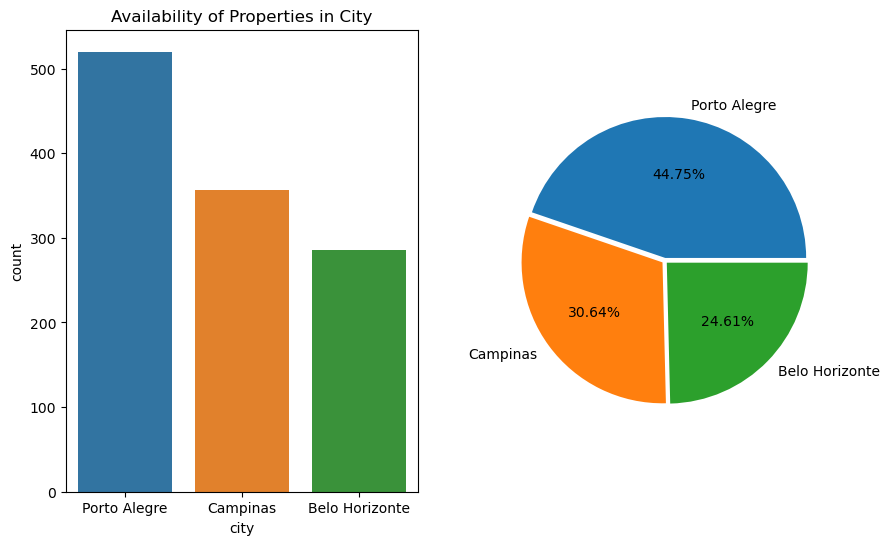

In [33]:
# Analyze City for Bachelors
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].set_title("Availability of Properties in City")
data = city['city'].value_counts()
labels = data.keys()
sns.countplot(x = city['city'], ax = ax[0])
plt.pie(data,labels=labels, autopct = '%.2f%%',explode = [0.02,0.02,0.02])
plt.show()

# Interpretation : Porto Alegre City have maximum counts of 2 rooms and whose are non-furnished , rent is less than 2000 and property tax is less than 100. So Porto Alegre City will be best for Bachelors according to less Expenditure.

# Task 2 - Analyze City for Mid-Family where room rent are less than 3000 Number of Rooms are 3 and Furnished.

In [34]:
city1 = brazil_country[(brazil_country['rooms']>2) & (brazil_country['rooms']<=3) & (brazil_country['rent amount (R$)']<2864) & (brazil_country['bathroom']>1) & (brazil_country['bathroom']<= 2) & (brazil_country['area']>110)& (brazil_country['area']<207)]

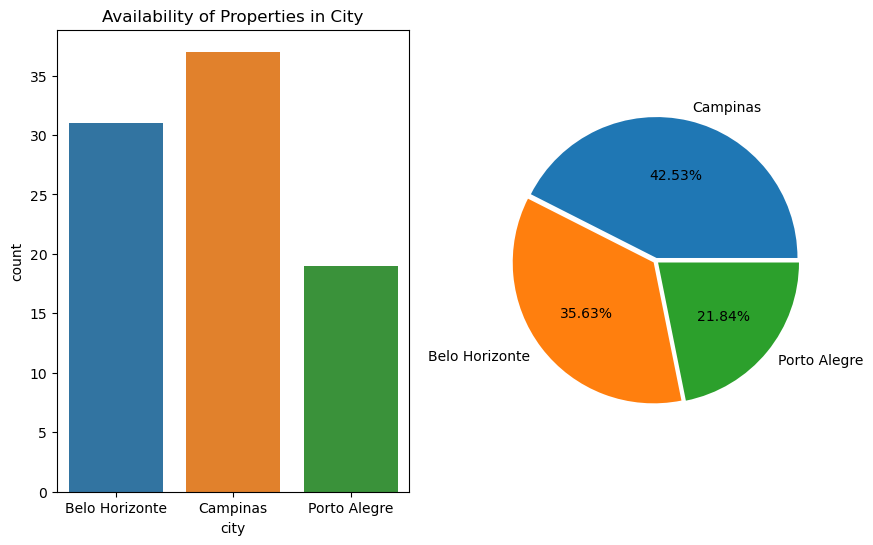

In [35]:
# Analyze City for Mid-Family
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].set_title("Availability of Properties in City")
data = city1['city'].value_counts()
labels = data.keys()
sns.countplot(x = city1['city'], ax = ax[0])
plt.pie(data,labels=labels, autopct = '%.2f%%',explode = [0.02,0.02,0.02])
plt.show()

# Interpretation : Here "Campinas" City have maximum Properties available and in which 3 rooms ,bathrooms are 3 and property tax is between 110 and 207. So Campinas City will be best for Mid-Family.

# Task 3 - Analyze City for Large-Family where rent of rooms are greater than  3700 , Number of Rooms are greater than 3.

In [36]:
city2 = brazil_country[(brazil_country['rooms']>3) & (brazil_country['rent amount (R$)']>3664) & (brazil_country['bathroom']>2) & (brazil_country['area']>207)]

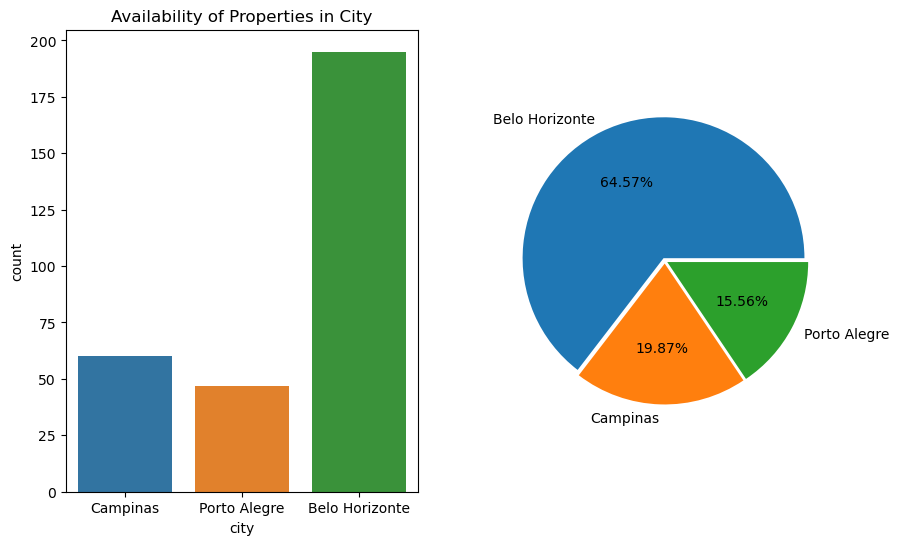

In [37]:
# Analyze City for Large-Family
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].set_title("Availability of Properties in City")
data = city2['city'].value_counts()
labels = data.keys()
sns.countplot(x = city2['city'], ax = ax[0])
plt.pie(data,labels=labels, autopct = '%.2f%%',explode = [0.02,0.02,0.02])
plt.show()

# Interpretation : Here "Belo Horizonte" City have maximum Properties. which have greater than 3 rooms , rent is greater than 3500 , bathrooms are more than 3 and area is greater than 207. So  "Belo Horizonte" City will be good Choice for Large-Family.